<a href="https://colab.research.google.com/github/yoonyanghyun/1-day-1-commit/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%A6%9D%EA%B6%8C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. pandas를 활용한 데이터분석


In [ ]:
import pandas as pd

df = pd.DataFrame({'KOSPI':[1915,1961,2026,2467,2041],
                   'KOSDAQ':[542, 682, 631, 798, 675]})
df

,KOSPI,KOSDAQ
0,1915,542
1,1961,682
2,2026,631
3,2467,798
4,2041,675


In [ ]:
df.describe()

,KOSPI,KOSDAQ
count,5.000000,5.000000
mean,2082.000000,665.600000
std,221.117616,92.683871
min,1915.000000,542.000000
25%,1961.000000,631.000000
50%,2026.000000,675.000000
75%,2041.000000,682.000000
max,2467.000000,798.000000


In [ ]:
kospi = pd.Series([1915, 1961, 2026, 2467, 2041],
                  index=[2014,2015,2017,2017,2018],name='KOSPI')
kospi

2014    1915
2015    1961
2017    2026
2017    2467
2018    2041
Name: KOSPI, dtype: int64

In [ ]:
# 야후 파이낸스로 주식 시세 구하기
!pip install yfinance

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

     |████████████████████████████████| 6.3 MB 8.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# 야후 파이낸스는 종가와 수정 종가가 일치하지 않음
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,46399.667969,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,47025.480469,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,45505.648438,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,46131.457031,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,45863.250000,10314997


In [ ]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17'],
              dtype='datetime64[ns]', name='Date', length=869, freq=None)

In [ ]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

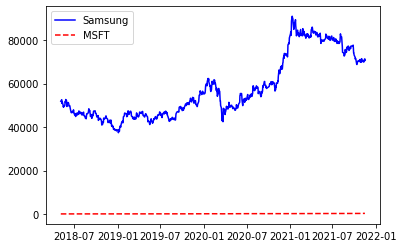

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close,'b', label='Samsung')
plt.plot(msft.index, msft.Close,'r--', label='MSFT')
plt.legend(loc='best') # 그래프 범례를 적절한 부분에 표시

가격이 일치하지 않아서 MSFT가 이동하지 않는 것처럼 보임

In [ ]:
# 일간 변동률로 주가 비교
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-11-11    69900.0
2021-11-12    70600.0
2021-11-15    71400.0
2021-11-16    71300.0
2021-11-17    70700.0
Name: Close, Length: 869, dtype: float64

In [ ]:
# 아래로 shift
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-11-11    70200.0
2021-11-12    69900.0
2021-11-15    70600.0
2021-11-16    71400.0
2021-11-17    71300.0
Name: Close, Length: 869, dtype: float64

In [ ]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1)-1) * 100
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

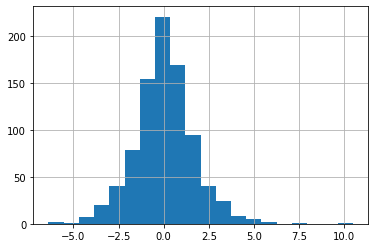

In [ ]:
# 2018/05/04 ~2021/10/29 까지의 일간 변동률 히스토그램
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=20)
plt.grid(True)
plt.show()

In [ ]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-11-11    41.726872
2021-11-12    42.728303
2021-11-15    43.861447
2021-11-16    43.721391
2021-11-17    42.879876
Name: Close, Length: 869, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


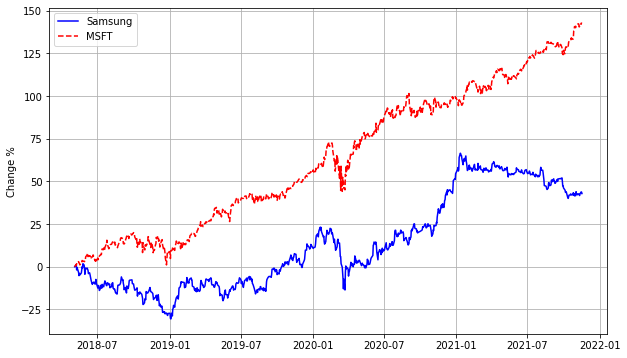

In [ ]:
# 삼전, MSFT 주식 수익률 비교

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100  # 종가-다음날 종가/ 다음날 종가 --> 일간 변동률
sec_dpc.iloc[0] = 0 # 일간 변동률 첫 번째 값은 0으로 변경
sec_dpc_cs = sec_dpc.cumsum() # 일간 변동률 누적합

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close']/ msft['Close'].shift(1) -1 ) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

# 일간 변동률 누적합 확인하기 2018년 5월 4일 부터 2021년 10월 29일까지 투자했으면 누적 수익률은 어떻게 되나?
plt.figure(figsize=(10,6))
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung')
plt.plot(msft.index, msft_dpc_cs, '--r', label='MSFT')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# 그냥 생각없이 MSFT를 샀으면 누적 수익률이 3년동안 125%를 상회 - MSFT
# 삼성전자도 생각없이 사면 3년 동안 누적 수익률이 50%정도가 된다

[*********************100%***********************]  1 of 1 completed


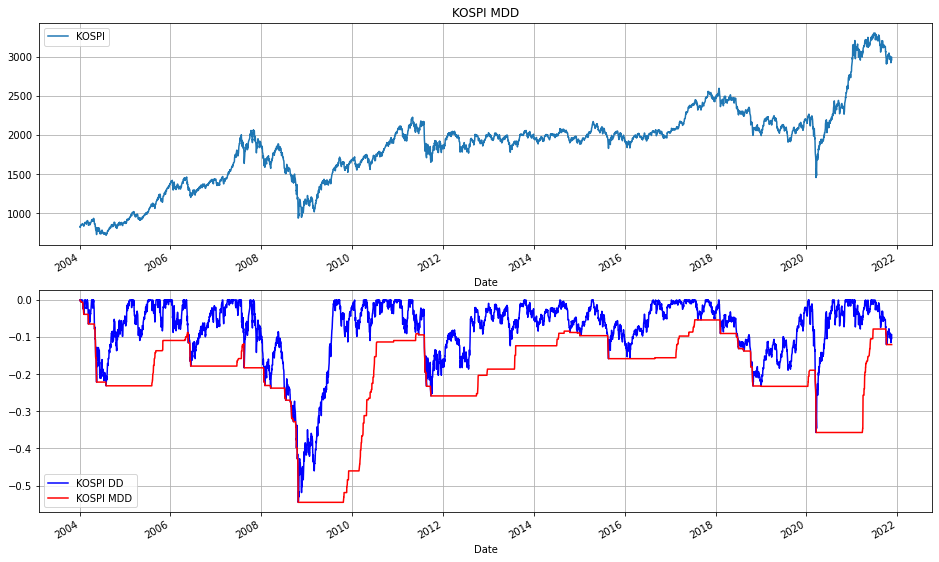

In [ ]:
# 최대 손실 낙폭 - Maximum DrawDown (최저점-최고점 / 최저점)

# KOSPI MDD는?
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')

window = 252 # 주식 개장일 설정
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() # 1년 기준 최고점 구하기
drawdown = kospi['Adj Close']/ peak - 1 # 최고치 대비 현재 종가가 얼마나 하락했는지
max_dd = drawdown.rolling(window, min_periods=1).min() # 1년 기준 최저점 구하기

#시각화
plt.figure(figsize=(16,10))

plt.subplot(211) # 2행 1열 중 (2,1)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)

plt.subplot(212) # 2행 1열 중 (2,2)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [ ]:
max_dd.min()

-0.5453665130144085

In [ ]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


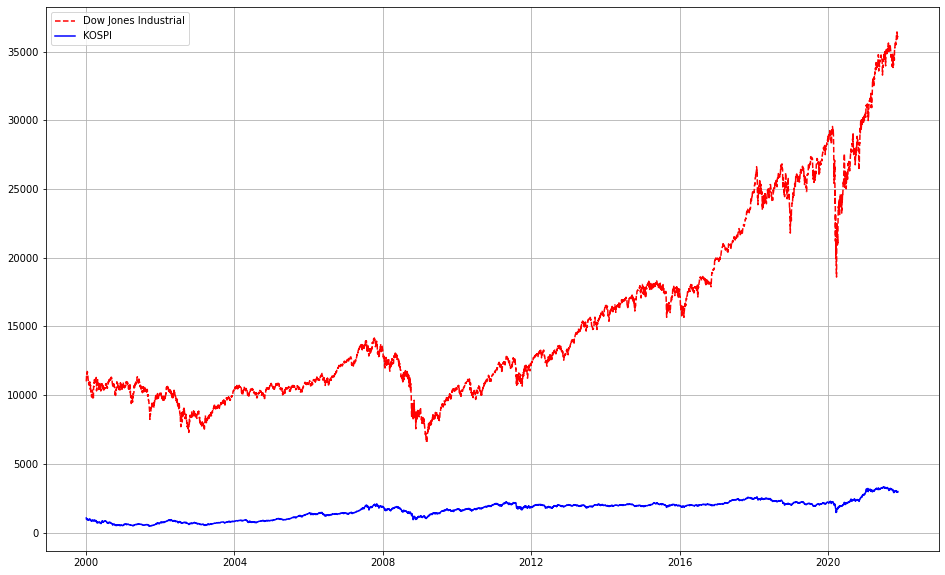

In [ ]:
# KOSPI, Daw Jones 지수 회귀분석
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI',start='2000-01-04')
kospi = pdr.get_data_yahoo('^KS11',start='2000-01-04')

# 시각화
plt.figure(figsize=(16,10))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

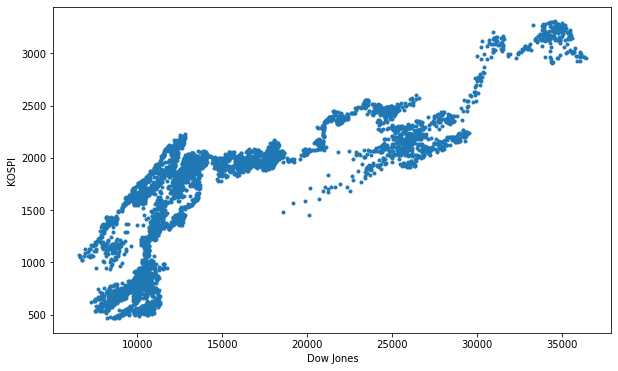

In [ ]:
# 산점도 분석

# x and y must be the same size 오류 해결
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill') # 이전 값으로 채우기

plt.figure(figsize=(10,6))
plt.scatter(df['DOW'],df['KOSPI'], marker='.')
plt.xlabel('Dow Jones')
plt.ylabel('KOSPI')
plt.show() 

In [ ]:
from scipy import stats
#df['DOW'].iloc[-1] = df['DOW'].iloc[-2]
regr = stats.linregress(df['DOW'],df['KOSPI'])
regr

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [ ]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.814526
KOSPI,0.814526,1.000000


In [ ]:
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2
r_squared

0.663451851920437

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


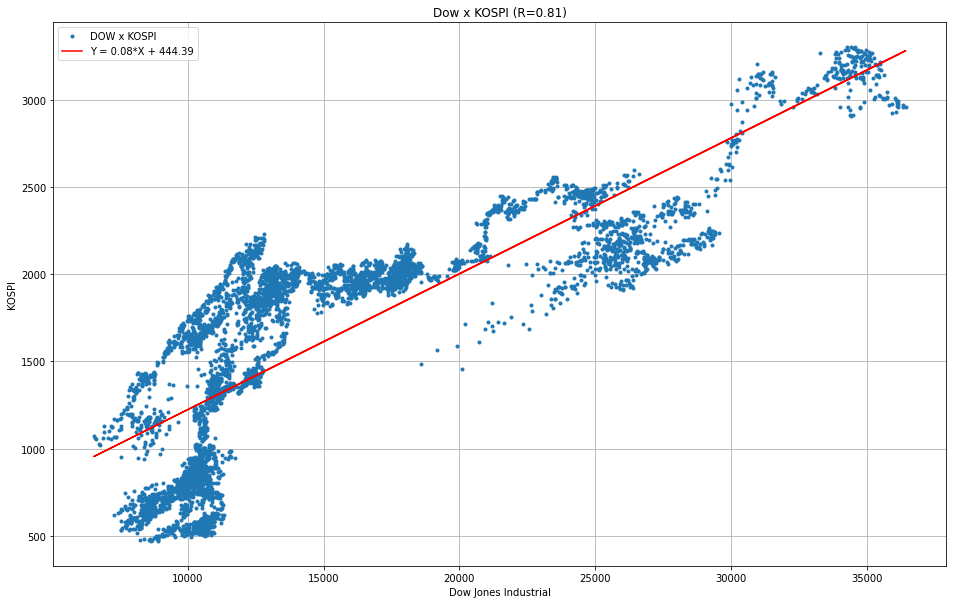

In [ ]:
yf.pdr_override()

#  다우존스, 코스피 회귀선과 산점도 확인
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

# 데이터 프레임 및 결측치 처리
df = pd.DataFrame({'X':dow['Close'],'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# 회귀선 
regr =stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'

# 시각화
plt.figure(figsize=(16,10))
plt.plot(df.X, df.Y,'.')
plt.plot(df.X, regr.slope * df.X+regr.intercept,'r')
plt.title(f'Dow x KOSPI (R={regr.rvalue:.2f})')
plt.legend(['DOW x KOSPI', regr_line])
plt.xlabel('Dow Jones Industrial')
plt.ylabel('KOSPI')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


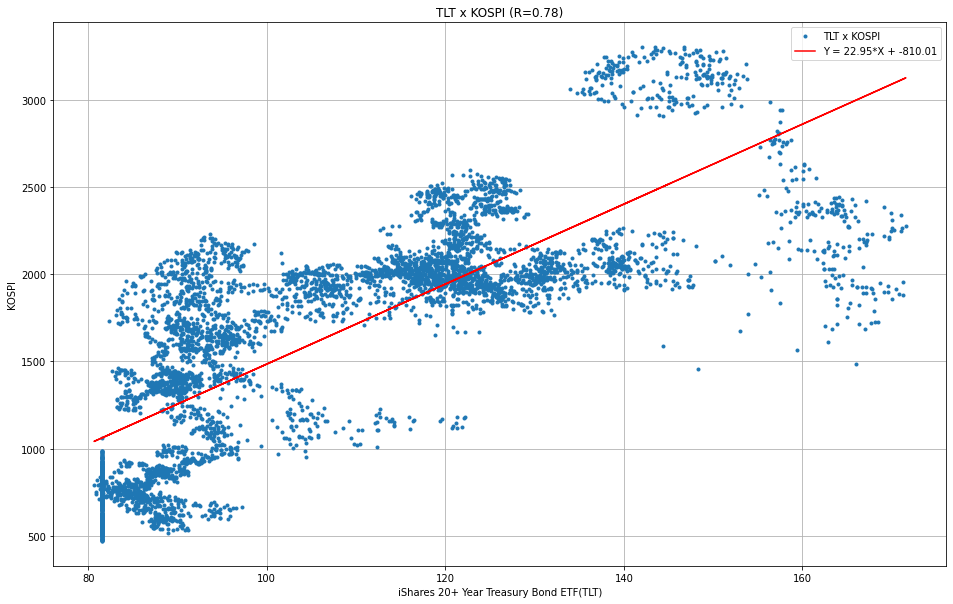

In [ ]:
yf.pdr_override()

#  미국 국채, 코스피 회귀선과 산점도 확인
tlt = pdr.get_data_yahoo('TLT','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

# 데이터 프레임 및 결측치 처리
df = pd.DataFrame({'X':tlt['Close'],'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# 회귀선 
regr =stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'

# 시각화
plt.figure(figsize=(16,10))
plt.plot(df.X, df.Y,'.')
plt.plot(df.X, regr.slope * df.X+regr.intercept,'r')
plt.title(f'TLT x KOSPI (R={regr.rvalue:.2f})')
plt.legend(['TLT x KOSPI', regr_line])
plt.xlabel('iShares 20+ Year Treasury Bond ETF(TLT)')
plt.ylabel('KOSPI')
plt.grid(True)
plt.show()

# 4. 웹 스크레이핑을 사용한 데이터 분석


In [ ]:
!pip install html5lib
!pip install lxml

In [ ]:
# pandas 상장법인 목록 읽기
# 한국거래소 기업공시채널(kind.krx.co.kr)에서 excel 다운로드 -> read_html() 함수를 통해 데이터 파악

krx_list = pd.read_excel('/content/drive/MyDrive/상장법인목록1.xlsx')
krx_list

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,디어유,376300,소프트웨어 개발 및 공급업,"모바일 어플리케이션(DearU bubble, Lysn)",2021-11-10,12월,안종오,http://www.dear-u.co,서울특별시
1,비트나인,357880,소프트웨어 개발 및 공급업,"그래프데이터베이스, 그래프분석서비스",2021-11-10,12월,강철순,http://bitnine.net,서울특별시
2,지니너스,389030,자연과학 및 공학 연구개발업,"NGS기반 조직생검 암유전체 동반진단(CancerSCAN), 액체생검 암유전체 동반...",2021-11-08,12월,박웅양,http://kr-geninus.com,서울특별시
3,카카오페이,377300,금융 지원 서비스업,"간편결제, 간편송금 및 기타 금융서비스",2021-11-03,12월,류영준,http://www.kakaopay.com,경기도
4,피코그램,376180,그외 기타 제품 제조업,"정수기, 정수기 필터",2021-11-03,12월,최석림,http://www.picogram.com,인천광역시
...,...,...,...,...,...,...,...,...,...
2471,CJ대한통운,120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2472,메리츠화재,60,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2473,경방,50,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2474,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [ ]:
krx_list.종목코드 = krx_list.종목코드.map('{:06d}'.format)
krx_list

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,디어유,376300,소프트웨어 개발 및 공급업,"모바일 어플리케이션(DearU bubble, Lysn)",2021-11-10,12월,안종오,http://www.dear-u.co,서울특별시
1,비트나인,357880,소프트웨어 개발 및 공급업,"그래프데이터베이스, 그래프분석서비스",2021-11-10,12월,강철순,http://bitnine.net,서울특별시
2,지니너스,389030,자연과학 및 공학 연구개발업,"NGS기반 조직생검 암유전체 동반진단(CancerSCAN), 액체생검 암유전체 동반...",2021-11-08,12월,박웅양,http://kr-geninus.com,서울특별시
3,카카오페이,377300,금융 지원 서비스업,"간편결제, 간편송금 및 기타 금융서비스",2021-11-03,12월,류영준,http://www.kakaopay.com,경기도
4,피코그램,376180,그외 기타 제품 제조업,"정수기, 정수기 필터",2021-11-03,12월,최석림,http://www.picogram.com,인천광역시
...,...,...,...,...,...,...,...,...,...
2471,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2472,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2473,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2474,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [ ]:
# 종목코드 순 정렬
krx_list = krx_list.sort_values(by='종목코드')
krx_list

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2382,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,유준하,http://www.dong-wha.co.kr,서울특별시
2374,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,노성석,http://www.krmotors.com,경상남도
2473,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2472,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2464,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 윤재엽",http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
331,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,"갈지휘, 마츠바라 켄지",http://www.snk-corp.co.jp,일본
170,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩
192,소마젠,950200,"그외 기타 전문, 과학 및 기술 서비스업","유전체 분석 서비스 (NGS, CES 등)",2020-07-13,12월,Ryan W. Kim (김운봉),http://psomagen.com,미국
101,프레스티지바이오파마,950210,자연과학 및 공학 연구개발업,바이오시밀러 및 항체의약품 신약,2021-02-05,06월,박소연,http://www.prestigebiopharma.com,싱가포르


In [ ]:
# 네이버 주가 크롤링
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

# url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
# with urlopen(url) as doc:
#   html = BeautifulSoup(doc, 'lxml')
#   pgrr = html.find('td', class_='pgRR')
#   print(html)

url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1' # 기존 웹도 그냥 가져오면 못 가져옴

headers = {'user-agent': 'Mozilla/5.0'}

res = requests.get(url, headers=headers)

#print('214,000' in res.text)
#print(res.text)

soup = BeautifulSoup(res.text, 'html5lib') # 21/11/10, 왜인지는 모르겠는데 lxml 파서로 당겨오면 웹을 가져오지 못함
css_selector ='body > table.type2 > tbody > tr > td:nth-of-type(2) > span'
css_selector1 ='body > table.Nnavi > tbody > tr > td.pgRR > a'
#result = soup.select(css_selector1)
pgrr = soup.find('td',class_='pgRR')

print(pgrr.a['href'])
print(pgrr.prettify())
print(pgrr.text)

/item/sise_day.naver?code=068270&page=404
<td class="pgRR">
 <a href="/item/sise_day.naver?code=068270&amp;page=404">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>


				맨뒤
				
				
				


In [ ]:
# 주가 시세 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
headers = {'user-agent': 'Mozilla/5.0'}
html = requests.get(url, headers=headers)

soup = BeautifulSoup(html.text, 'html5lib')
pgrr = soup.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
print(s)
last_page = s[-1]
print(last_page)

['/item/sise_day.naver?code', '068270&page', '404']
404


In [ ]:
# # 전체 페이지 읽어오기
# df = pd.DataFrame()
# sise_url = 'https://finance.naver.com/item/sise_day.naver?code=068270'

# for page in range(1, int(last_page)+1):
#   page_url = '{}&page={}'.format(sise_url, page)
#   df = df.append(pd.read_html(requests.get(url, headers={'user-agent': 'Mozilla/5.0'}).text),header=0)[0]) # 네이버 증권 웹페이지 변경됨. 웹을 그냥 불러오면 정상적인 페이지로 가져오지 않는다. headers에 추가 변수를 만들어서 가져와야함

# df = df.dropna() # 값 빠진 행 제거
# print(df)

SyntaxError: ignored

In [ ]:
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
df = pd.DataFrame()
df = df.append(pd.read_html(requests.get(url, headers={'user-agent': 'Mozilla/5.0'}).text))

In [ ]:
# 전체 페이지 불러오기
df = pd.DataFrame()
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page='
headers={'user-agent': 'Mozilla/5.0'}
for page in range(1, 10):
  page_url = '{}{}'.format(url, page)
  response = requests.get(url, headers=headers)
  html = BeautifulSoup(response.text,'lxml')
  html_table = html.select('table')

  table = pd.read_html(str(html_table))
  table = table[0].dropna()
  df1 = pd.DataFrame(table) # 왜 그런지는 모르겠는데 똑같은 데이터 프레임을 불러온다.. 함수화 해야할듯
  df = df.append(df1)
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.11.17,219000.0,10000.0,227500.0,230000.0,218500.0,899256.0
2,2021.11.16,229000.0,4000.0,232000.0,235000.0,226000.0,1009172.0
3,2021.11.15,233000.0,19500.0,227000.0,251000.0,221500.0,4479850.0
4,2021.11.12,213500.0,1000.0,232000.0,232500.0,213000.0,1592862.0
5,2021.11.11,212500.0,1500.0,210000.0,215000.0,207500.0,681176.0
...,...,...,...,...,...,...,...
9,2021.11.10,214000.0,8500.0,210500.0,221000.0,209000.0,1274733.0
10,2021.11.09,205500.0,8500.0,198500.0,207500.0,197500.0,703159.0
11,2021.11.08,197000.0,12000.0,202000.0,203000.0,193500.0,1181053.0
12,2021.11.05,209000.0,500.0,208500.0,209500.0,203500.0,488779.0


In [ ]:
def get_day_list(page_no): # 셀트리온
  url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page={}'.format(page_no)
  headers = {'user-agent': 'Mozilla/5.0'}
  
  response = requests.get(url, headers=headers)

  html = BeautifulSoup(response.text, 'lxml')

  table = html.select('table')

  table = pd.read_html(str(table))

  df_day = table[0].dropna()
  return df_day

In [ ]:
## 시간이 너무 오래 걸려서 생략

# df = pd.DataFrame()
# for page in range(1, int(last_page)+1):
#   df1 = get_day_list(page)
#   df = df.append(df1)
# df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.11.17,219000.0,10000.0,227500.0,230000.0,218500.0,899256.0
2,2021.11.16,229000.0,4000.0,232000.0,235000.0,226000.0,1009172.0
3,2021.11.15,233000.0,19500.0,227000.0,251000.0,221500.0,4479850.0
4,2021.11.12,213500.0,1000.0,232000.0,232500.0,213000.0,1592862.0
5,2021.11.11,212500.0,1500.0,210000.0,215000.0,207500.0,681176.0
...,...,...,...,...,...,...,...
9,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
10,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
11,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
12,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0


AttributeError: ignored

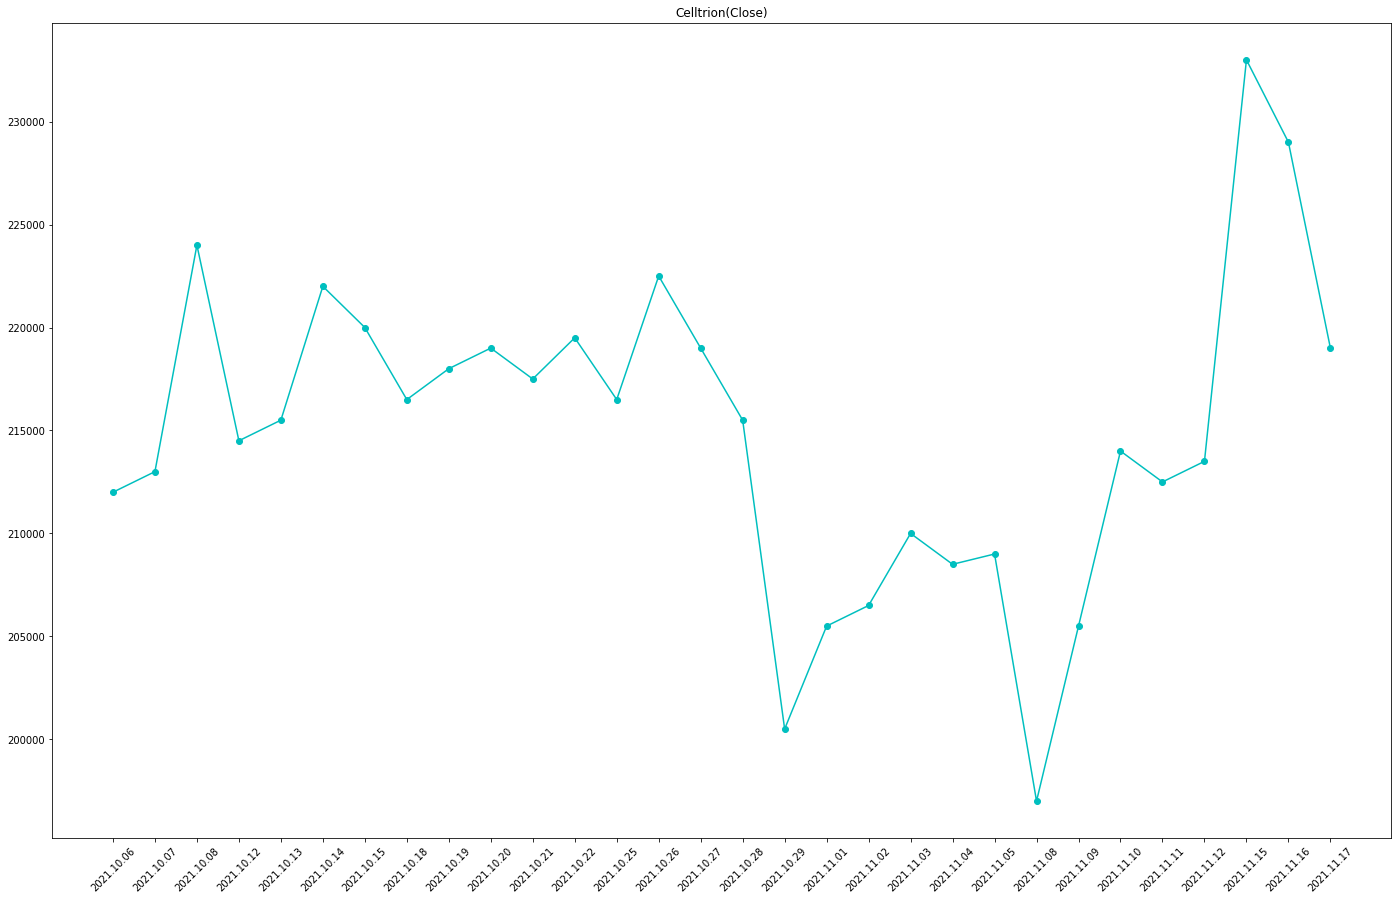

In [ ]:
# 셀트리온 종가 차트 그리기 - 전체
import pandas as pd
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1' # 셀트리온 주가 시세 구하기
headers = {'user-agent': 'Mozilla/5.0'}
html = requests.get(url, headers=headers) # 책과는 다름. 프로토콜이 송수신 되는 환경에서 크롤링해야 함

soup = BeautifulSoup(html.text, 'lxml')
pgrr = soup.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
#print(s) # pgRR 태그 내 속성 출력
last_page = s[-1]
#print(last_page) # 마지막 페이지 출력

## 전체 페이지 읽어오기
def get_day_list(page_no): # 셀트리온 시세 출력 함수 설정
  url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page={}'.format(page_no)
  headers = {'user-agent': 'Mozilla/5.0'}
  response = requests.get(url, headers=headers)
  html = BeautifulSoup(response.text, 'lxml')
  table = html.select('table')
  table = pd.read_html(str(table))
  df_day = table[0].dropna()
  return df_day

df = pd.DataFrame()
for page in range(1, int(last_page)+1): # 첫페이지부터 마지막 페이지 까지의 시세 창을 stack
  df1 = get_day_list(page)
  df = df.append(df1)

## 차트로 종가 표현해 보기
df_30 = df.iloc[0:30] # 전부는 길기 때문에 최근 1달 종가만 파악
df_30 = df_30.sort_values(by='날짜') # 날짜 오름차순 정렬

## 차트 그리기
plt.figure(figsize=(24,15))
plt.title('Celltrion(Close)')
plt.xticks(rotation=45) # x 변수(시계열)를 45도 돌려서 확인
plt.plot(df_30['날짜'],df_30['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

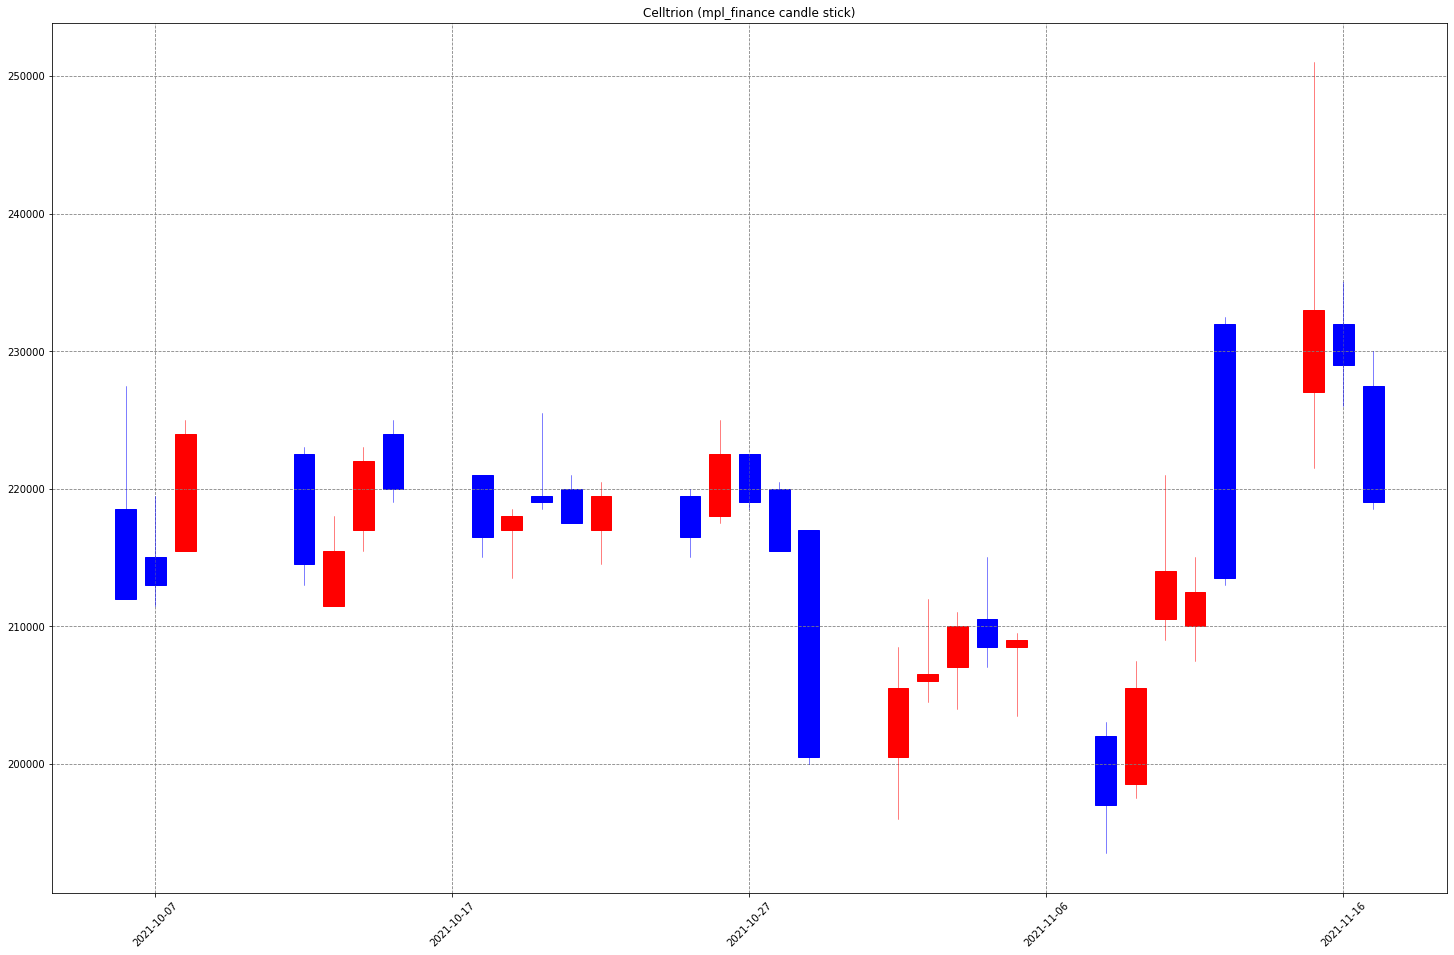

In [ ]:
# 캔들 차트 그리기
!pip install mpl_finance
import pandas as pd
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from datetime import datetime

## 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
headers = {'user-agent': 'Mozilla/5.0'}
html = requests.get(url, headers=headers) 
soup = BeautifulSoup(html.text, 'lxml')
pgrr = soup.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

## 페이지 읽어오기 - 최근 1달만
df = pd.DataFrame()
for page in range(1, 4): # 한 페이지에 대략 15일 정도 들어 있으니 1달 반? 정도 파악
  df1 = get_day_list(page)
  df = df.append(df1)

## 데이터 가공
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
  dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() # '년.월.일' 문자열 -> datetime형  변환
  df['날짜'].values[idx] = mdates.date2num(dt) #datetime형 -> float 변환
ohlc = df[['날짜','시가','고가','저가','종가']]

## mpl_finance 차트 그리기
plt.figure(figsize=(25,16))
ax = plt.subplot(1,1,1)
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue') #candlestick_ohlc(quotes 인수 - time,open,high,low,close)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # 년-월-일 형식의 문자열로 변환

plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

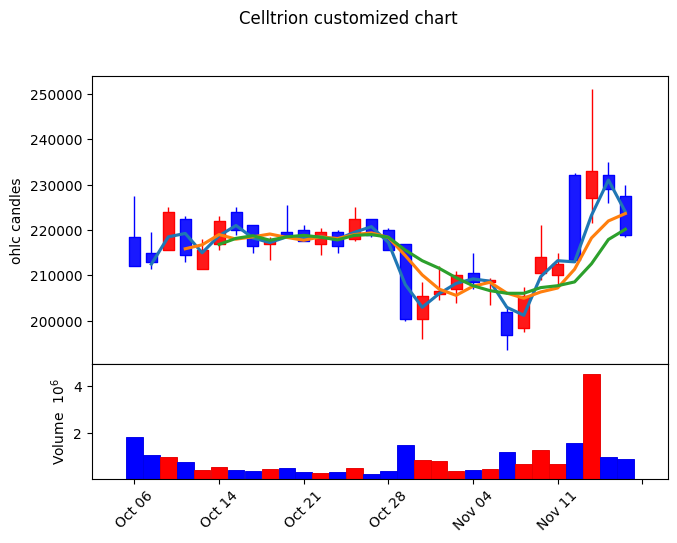

In [ ]:
# 신버전 차트 그리기
!pip install --upgrade mplfinance
import pandas as pd
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import datetime
import mplfinance as mpf

### mpl.plot(OHLC 데이터 프레임, title-제목, type-차트형태, mav-이동평균선, volume-거래량표시여부, ylabel-y축레이블)

## 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
headers = {'user-agent': 'Mozilla/5.0'}
html = requests.get(url, headers=headers) 
soup = BeautifulSoup(html.text, 'lxml')
pgrr = soup.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

## 페이지 읽어오기 - 최근 1달만
df = pd.DataFrame()
for page in range(1, 4): # 한 페이지에 대략 15일 정도 들어 있으니 1달 반? 정도 파악
  df1 = get_day_list(page)
  df = df.append(df1)

## 데이터 프레임 가공
df = df.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open','High','Low','Close','Volume']]

## mpf 차트 그리기
# mpf.plot(df, title='Celltrion candle chart', type='candle') # 캔들형 그래프
# mpf.plot(df, title='Celltrion candle chart', type='ohlc') # OHLC형 그래프
kwargs = dict(title='Celltrion customized chart', type='candle', mav=(2,4,6), volume=True, ylabel='ohlc candles') # Keyword argument - 인수 담기
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)

plt.figure(figsize=(16,9))
mpf.plot(df, **kwargs, style=s)

# 5.시세 DB 구축 및 시세 조회 API 개발


사실 야후 파이낸스 데이터를 이용하면 한국 주식의 수정 종가가 정확하지 않음 ex)액면분할, 무상증자, 유상증자 etc.. 으로 인한 종가 수정 데이터가 정확하지 않다

대신 네이버 금융의 주식 데이터를 웹스크래핑 후 데이터베이스를 구축한 뒤 이를 이용하기

마리아디비 설치 후 확인 - window64

설치경로 확인, root 암호 설정

cmd 창에서 확인 - 해당 주소>mysql.exe -u root -p

create database investar; - 데이터베이스 생성

show databases; - 데이터베이스 확인

use investar; - 데이터베이스 investar로 변경

show tables;

select version;

drop databases investar;

GUI 기반 HeidiSQL

인터페이스 창으로 실행 가능

In [ ]:
!pip install pymysql
import pymysql

     |████████████████████████████████| 43 kB 1.8 MB/s 


In [ ]:
# connetion = pymysql.connect(host='localhost',port=3307, db='INVESTAR', user='root', passwd='1234', autocommit=True)

# cursor = connetion.cursor()
# cursor.execute('SELECT VERSION();')
# result = cursor.fetchone()

# print('MariaDB version: {}'.format(result))

#connection.close()

# 오류 -> 서비스 창에 mysql이 뜨지 않았음.
# port가 mysql하고 mariadb하고 같다. 다르게 했는데도 안됨
# 해결 -> 웹브라우저 기반 코딩 환경에서는 pymysql이 지원되지 않음

OperationalError: ignored

In [ ]:
class DBupdater:
  def __init__(self):
    '''생성자: MariaDB 연결 및 종목코드 딕셔너리 생성'''
  def __del__(self):
    '''소멸자: MariaDB 연결 해제'''
  def read_krx_code(self):
    '''KRX로부터 상장법인목록 파일을 읽어와서 데이터프레임으로 반환'''
  def update_comp_info(self):
    '''종목코드를 company_info 테이블에 업데이트한 후 딕셔너리에 저장'''
  def read_naver(self, code, company, pages_to_fetch):
    '''네이버 금융에서 주식 시세를 읽어 데이터 프레임으로 반환'''
  def replace_into_db(self, df, num, code, company):
    '''네이버 금융에서 읽어온 주식 시세를 DB에 REPLACE'''
  def update_daily_price(self, pages_to_fetch):
    '''KRX 상장법인의 주식 시세를 네이버로부터 읽어 DB에 업데이트'''
  def execute_daily(self):
    '''실행 즉시 및 매일 오후 다섯시에 daily_price 테이블 업데이트'''

if __name__ =='__main__':
  dbu = DBupdater()
  dbu.execute_daily()

In [ ]:
CREATE TABLE IF NOT EXISTS company_info(
    code VARCHAR(20),
    company VARCHAR(40),
    last_update DATE,
    PRIMARY KEY (code)
);

CREATE TABLE IF NOT EXISTS daily_price(
    code VARCHAR(20),
    date DATE,
    open BIGINT(20),
    high BIGINT(20),
    low BIGINT(20),
    close BIGINT(20),
    diff BIGINT(20),
    volume BIGINT(20),
    PRIMARY KEY (code, date)
);